In [2]:
import numpy as np

np.random.seed(1338)
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D

Using TensorFlow backend.


In [3]:
from keras.utils import np_utils
from keras.optimizers import SGD

In [4]:
# Load the data
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [5]:
X_train_orig = X_train
X_test_orig = X_test

In [6]:
from keras import backend as K


In [7]:
img_rows, img_cols = 28, 28

if K.image_data_format() == 'channels_first':
    shape_ord = (1, img_rows, img_cols)
else:
    shape_ord = (img_rows, img_cols, 1)

In [8]:
X_train = X_train.reshape((X_train.shape[0],) + shape_ord)
X_test = X_test.reshape((X_test.shape[0],) + shape_ord)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_test /= 255
X_train /= 255

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

[5 0 4 1 9 2 1 3 1 4]


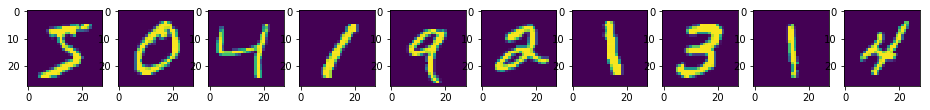

In [10]:
print(Y_train[0:10])

slice = 10
plt.figure(figsize=(16, 8))
for i in range(slice):
    plt.subplot(1, slice, i + 1)
    plt.imshow(X_train_orig[i], interpolation='nearest')
    #plt.axis('off')

[7 2 1 0 4 1 4 9 5 9]


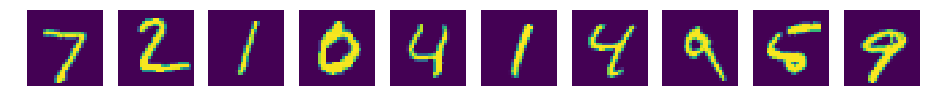

In [11]:
print(Y_test[0:10])
slice = 10
plt.figure(figsize=(16,8))
for i in range(slice):
    plt.subplot(1,slice,i+1)
    plt.imshow(X_test_orig[i], interpolation='nearest')
    plt.axis('off')

In [12]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)
nb_classes = 10
Y_train = np_utils.to_categorical(Y_train,nb_classes)
Y_test = np_utils.to_categorical(Y_test,nb_classes)
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)
print(Y_train[0:10])
print(Y_test[0:10])

(60000, 28, 28, 1) (60000,) (10000, 28, 28, 1) (10000,)
(60000, 28, 28, 1) (60000, 10) (10000, 28, 28, 1) (10000, 10)
[[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]]
[[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]]


In [13]:
nb_epoch = 10
batch_size = 32
# number of convolutional filters to use
nb_filters = 32
# size of pooling area for max pooling
nb_pool = 2
# convolution kernel size
nb_conv = 3

# Vanilla SGD
sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)

In [14]:
#Model
model = Sequential()

model.add(Conv2D(nb_filters, (nb_conv, nb_conv), padding='valid',
                 input_shape=shape_ord))  # note: the very first layer **must** always specify the input_shape
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dense(nb_classes))
model.add(Activation('softmax'))
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 21632)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                216330    
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
Total params: 216,650
Trainable params: 216,650
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])


In [16]:
hist = model.fit(X_train,Y_train,batch_size=batch_size,epochs=nb_epoch,
                 verbose=1,validation_data=(X_test,Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 18s 300us/step - loss: 0.1726 - acc: 0.9494 - val_loss: 0.0830 - val_acc: 0.9736
Epoch 2/10
60000/60000 [==============================] - 18s 306us/step - loss: 0.0802 - acc: 0.9760 - val_loss: 0.1017 - val_acc: 0.9718
Epoch 3/10
60000/60000 [==============================] - 18s 305us/step - loss: 0.0605 - acc: 0.9807 - val_loss: 0.0960 - val_acc: 0.9718
Epoch 4/10
60000/60000 [==============================] - 18s 302us/step - loss: 0.0435 - acc: 0.9861 - val_loss: 0.1315 - val_acc: 0.9715
Epoch 5/10
60000/60000 [==============================] - 18s 303us/step - loss: 0.0309 - acc: 0.9903 - val_loss: 0.1018 - val_acc: 0.9758
Epoch 6/10
60000/60000 [==============================] - 18s 302us/step - loss: 0.0257 - acc: 0.9921 - val_loss: 0.1136 - val_acc: 0.9742
Epoch 7/10
60000/60000 [==============================] - 18s 307us/step - loss: 0.0175 - acc: 0.9946 - val_loss: 0.

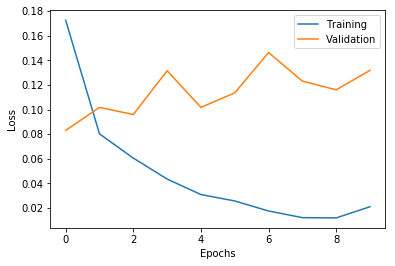

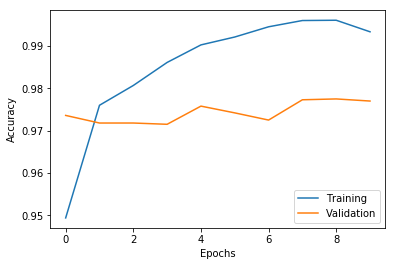

In [17]:
plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['Training', 'Validation'])

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.legend(['Training', 'Validation'], loc='lower right')

In [18]:
print('Available Metrics in Model: {}'.format(model.metrics_names))


Available Metrics in Model: ['loss', 'acc']


In [19]:
# Evaluating the model on the test data    
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

Test Loss: 0.131871198389
Test Accuracy: 0.977


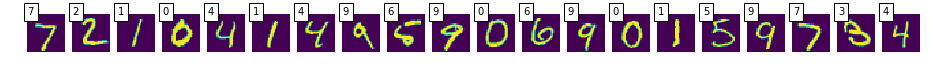

In [20]:
slice = 20
predicted = model.predict(X_test[:slice]).argmax(-1)

plt.figure(figsize=(16,8))
for i in range(slice):
    plt.subplot(1, slice, i+1)
    plt.imshow(X_test_orig[i], interpolation='nearest')
    plt.text(0, 0, predicted[i], color='black', 
             bbox=dict(facecolor='white', alpha=1))
    plt.axis('off')